# Customer Spend Prediction - Using Simple Linear Regression
by A4Ayub Data Science Labs (http://www.a4ayub.me/)

### Class Problem Statement

Build a model to predict customer spend based on day of week

<font color="red">**Please take note that the illustrations in this notebook is NOT for results/accuracy but for explaining the various concepts**</font>

### Data Description

<font color="red">**This data is proprietory and cannot be shared to anyone who is NOT attending A4Ayub Data Science Labs.!**</font>

Each row in the dataset corresponds to one unique product in a basket (e.g. if there are three occurences of the same product in that basket, it will have one row for the product in that basket, with quantity equal to three)

The file has the below structure:

| Column Name | Description | Type | Sample Values |
| --- | --- | --- | --- |
| shop_week | Identifies the week of the basket | Char | Format is YYYYWW where the first 4 characters identify the fiscal year and the other two characters identify the specific week within the year (e.g. 200735). Being the fiscal year, the first week doesn’t start in January.  (See time.csv file for start/end dates of each week) |
| shop_date | Date when shopping has been made. Date is specified in the yyyymmdd format | Char | 20060413, 20060412 |
| shop_weekday | Identifies the day of the week | Num | 1=Sunday, 2=Monday, …, 7=Saturday |
| shop_hour | Hour slot of the shopping | Num | 0=00:00-00:59, 1=01:00-01:59, …23=23:00-23:59 |
| Quantity | Number of items of the same product bought in this basket | Num | Integer number |
| spend | Spend associated to the items bought | Num | Number with two decimal digits |
| prod_code | Product Code | Char | PRD0900001, PRD0900003 |
| prod_code_10 | Product Hierarchy Level 10 Code | Char | CL00072, CL00144 |
| prod_code_20 | Product Hierarchy Level 20 Code | Char | DEP00021, DEP00051 |
| prod_code_30 | Product Hierarchy Level 30 Code | Char | G00007, G00015 |
| prod_code_40 | Product Hierarchy Level 40 Code | Char | D00002, D00003 |
| cust_code | Customer Code | Char | CUST0000001624, CUST0000001912 |
| cust_price_sensitivity | Customer’s Price Sensitivity | Char | LA=Less Affluent, MM=Mid Market, UM=Up Market, XX=unclassified |
| cust_lifestage | Customer’s Lifestage | Char | YA=Young Adults, OA=Older Adults, YF=Young Families, OF=Older Families, PE=Pensioners, OT=Other, XX=unclassified |
| basket_id | Basket ID. All items in a basket share the same basket_id value. | Num | 994100100000020, 994100100000344 |
| basket_size | Basket size | Char | L=Large, M=Medium, S=Small |
| basket_price_sensitivity | Basket price sensitivity  | Char | LA=Less Affluent, MM=Mid Market, UM=Up Market, XX=unclassified |
| basket_type | Basket type | Char | Small Shop, Top Up, Full Shop, XX |
| basket_dominant_mission | Shopping dominant mission | Char | Fresh, Grocery, Mixed, Non Food, XX |
| store_code | Store Code | Char | STORE00001, STORE00002 |
| store_format | Format of the Store | Char | LS, MS, SS, XLS |
| store_region | Region the store belongs to | Char | E02, W01, E01, N03 |


### Workbench

#### Importing the required libraries

In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Import the warnings
import warnings

# Import statsmodels
import statsmodels.formula.api as smf

# Import RMSE
from statsmodels.tools.eval_measures import rmse

# Imort Linear Regression from scikit-learn
from sklearn.linear_model import LinearRegression

# configuration settings
%matplotlib inline 
sns.set(color_codes=True)
warnings.filterwarnings('ignore') ## Surpress the warnings

#### Load the data into a dataframe

In [2]:
# load the data into a dataframe called supermarket_till_transactions_df
supermarket_till_transactions_df = pd.read_csv("../supermarket_till_transactions.csv")

In [3]:
# view the top five records
supermarket_till_transactions_df.head(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200607,20060413,5,20,1,103,PRD0900097,CL00001,DEP00001,G00001,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
1,200607,20060412,4,19,1,28,PRD0900353,CL00070,DEP00020,G00007,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200607,20060413,5,20,3,84,PRD0900550,CL00167,DEP00055,G00016,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
3,200607,20060412,4,19,1,221,PRD0901647,CL00010,DEP00003,G00002,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
4,200607,20060413,5,20,1,334,PRD0902064,CL00073,DEP00021,G00007,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02


In order to illustrate Simple Linear Regression we just need two variables which are:
1. SHOP_WEEKDAY
2. SPEND

In [4]:
supermarket_till_transactions_df = supermarket_till_transactions_df[["SHOP_WEEKDAY","SPEND"]]
supermarket_till_transactions_df.head(5)

,SHOP_WEEKDAY,SPEND
0,5,103
1,4,28
2,5,84
3,4,221
4,5,334


#### Using Ordinary Least Squares Method (OLS)

There are two kinds of variables in a alinear regression model:
1. The input or predictor variable commonly refered to as **X**
2. The output is the variable that we want to predict commonly refered to as **Y**

![Linear Regression Formula Image](../images/simple-linear-regression-standard-formula.PNG)

where Yₑ is the estimated or predicted value of Y based on our linear equation.

The objective of the Ordinary Least Square Method is to find the values of $\alpha$ and $\beta$ in the **y = $\beta$x + $\alpha$** linear regression equation that minimise the sum of the squared difference between Y and Yₑ.

![Alpha-Beta Formula Image](../images/alpha-beta-formula.PNG) 

where X̄ is the mean of X values and Ȳ is the mean of Y values.

**β as simply Cov(X, Y) / Var(X)**

If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of Y, given the value of X.

In [5]:
X = supermarket_till_transactions_df["SHOP_WEEKDAY"]
y = supermarket_till_transactions_df["SPEND"]

# calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
supermarket_till_transactions_df['xycov'] = (supermarket_till_transactions_df['SHOP_WEEKDAY'] - xmean) * (supermarket_till_transactions_df['SPEND'] - ymean)
supermarket_till_transactions_df['xvar'] = (supermarket_till_transactions_df['SHOP_WEEKDAY'] - xmean)**2

# Calculate beta and alpha
beta = supermarket_till_transactions_df['xycov'].sum() / supermarket_till_transactions_df['xvar'].sum()
alpha = ymean - (beta * xmean)

In [6]:
# View the alpha and beta values
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 330.09788218544224
beta = -30.045025805303435


Great, we now have an estimate for alpha and beta! Our model can be written as Yₑ = 330.098 + -30.045 X, and we can start making predictions:

In [7]:
ypred = alpha + beta * X

In [8]:
# View the predictions
ypred

0      179.872753
1      209.917779
2      179.872753
3      209.917779
4      179.872753
5      179.872753
6      179.872753
7      209.917779
8      179.872753
9      209.917779
10     179.872753
11     179.872753
12     149.827727
13     149.827727
14     149.827727
15     149.827727
16     239.962805
17     149.827727
18     149.827727
19     239.962805
20     149.827727
21     149.827727
22     149.827727
23     149.827727
24     239.962805
25     149.827727
26     239.962805
27     149.827727
28     149.827727
29     179.872753
          ...    
89     209.917779
90     209.917779
91     209.917779
92     209.917779
93     209.917779
94     209.917779
95     209.917779
96     209.917779
97     209.917779
98     209.917779
99     209.917779
100    209.917779
101    209.917779
102    209.917779
103    209.917779
104    209.917779
105    209.917779
106    209.917779
107    209.917779
108    239.962805
109    239.962805
110    179.872753
111    239.962805
112    179.872753
113    179

Let’s plot our prediction ypred against the actual values of y, to get a better visual understanding of our model.

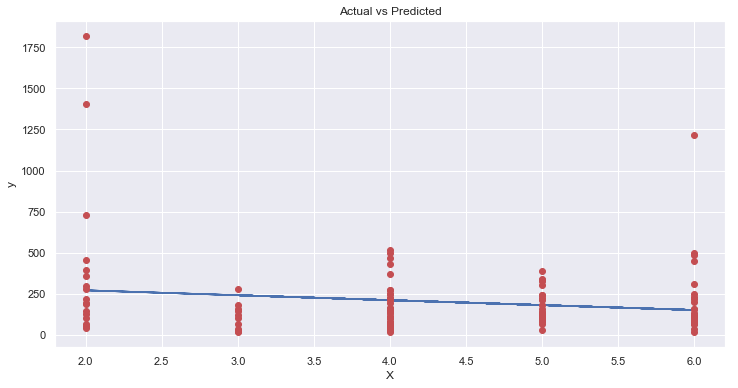

In [9]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

The blue line is our line of best fit i.e. Yₑ = 330.098 + -30.045 X

We can see from this graph that there is a negative linear relationship between X and y. Using our model, we can predict y from any values of X!

For example, if we had a value X = 7, we can predict that: (According to the data description 7 represents Saturday)

Yₑ = 330.098 + -30.045 (7) = **119.783**

According to this it means that customer spend reduces from Monday to Saturday

#### Using statsmodels

In [10]:
# Initialise and fit linear regression model using `statsmodels`
stats_model = smf.ols('SPEND ~ SHOP_WEEKDAY', data=supermarket_till_transactions_df)
stats_model = stats_model.fit()

We no longer have to calculate alpha and beta ourselves as this method does it automatically for us! Calling model.params will show us the model’s parameters:

In [11]:
stats_model.params

Intercept       330.097882
SHOP_WEEKDAY    -30.045026
dtype: float64

From the results above:

1. β0 = 330.097882 - This is the y intercept when x is zero
2. β1 = -30.045026 - This is the regression coefficient that measures a unit change in SPEND when SHOP_WEEKDAY changes

The negative value on the regression co-efficient for SHOP_WEEKDAY means that SHOP_WEEKDAY has a negative impact to the SPEND. 


In [12]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SPEND   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.797
Date:                Fri, 17 Jan 2020   Prob (F-statistic):             0.0971
Time:                        22:02:41   Log-Likelihood:                -823.42
No. Observations:                 119   AIC:                             1651.
Df Residuals:                     117   BIC:                             1656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      330.0979     79.239      4.166      0.000     173.169     487.027
SHOP_WEEKDAY   -30.0450     17.965     -1.672      0.097     -65.625       5.535
==============================================================================
Omnibus:                      125.423   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1847.385
Skew:                           3.748   Prob(JB):                         0.00
Kurtosis:                      20.787   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### R-Squared

***The Coefficient of determination, R-Squared*** – This is used to measure how much of the variation in the outcome can be explained by the variation in the independent variables. R-Squared always increases as more predictors are added to the MLR model even though the predictors may not be related to the outcome variable.

R2 by itself can't thus be used to identify which predictors should be included in a model and which should be excluded. R2 can only be between 0 and 1, where 0 indicates that the outcome cannot be predicted by any of the independent variables and 1 indicates that the outcome can be predicted without error from the independent variables.

In [13]:
# print the R-squared value for the model
stats_model.rsquared

0.02334656617517894

**This means that <font color="red">2.335%</font> of the SPEND can be explained by SHOP_WEEKDAY**

##### Adjusted R-Squared

When we add more predictor variables into the equation, R-Squared will always increase making R-Squared not accurate as the number of predictor variables increases.

Adjusted R-Squared, accounts for the increase of the predictor variables.

Because of the nature of the equation, the adjusted R-Squared should always be lower or equal to the R-Squared

In [14]:
# print the Adjusted R-squared value for the model
stats_model.rsquared_adj

0.014999100928812958

##### Confidence in the model

A confidence interval gives an estimated range of values which is likely to include an unknown population parameter, the estimated range being calculated from a given set of sample data. 

A confidence interval is how much uncertainty there is with any particular statistic. Confidence intervals are often used with a margin of error. It tells you how confident you can be that the results reflect what you would expect to find if it were possible to study the entire population. 

In [15]:
# print the confidence intervals for the model coefficients
stats_model.conf_int()

,0,1
Intercept,173.168683,487.027081
SHOP_WEEKDAY,-65.624681,5.534630


##### Hypothesis Testing and P-Values

In [16]:
# print the p-values for the model coefficients
stats_model.pvalues

Intercept       0.000060
SHOP_WEEKDAY    0.097122
dtype: float64

Now that we’ve fit a simple regression model, we can try to predict the values of spend based on the equation we just derived using the .predict method.

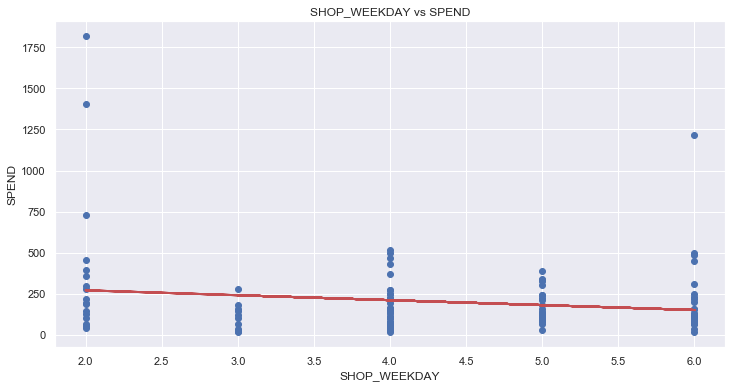

In [17]:
# Predict values
spend_pred = stats_model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(supermarket_till_transactions_df['SHOP_WEEKDAY'], supermarket_till_transactions_df['SPEND'], 'o')           # scatter plot showing actual data
plt.plot(supermarket_till_transactions_df['SHOP_WEEKDAY'], spend_pred, 'r', linewidth=2)   # regression line
plt.xlabel('SHOP_WEEKDAY')
plt.ylabel('SPEND')
plt.title('SHOP_WEEKDAY vs SPEND')

plt.show()

With this model, we can predict spend from given day of the week. For example, if we want to predict the spend for sunday, we can predict that spend will increase to 300.05 shillings:

In [18]:
new_X = 1
ypred = stats_model.predict({"SHOP_WEEKDAY": new_X})

##### RMSE

The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed

The smaller the value the better

In [19]:
# calc rmse
rmse = rmse(y, ypred)
rmse

266.02338158279343